<a href="https://www.kaggle.com/code/bhavinmoriya/learn-polars?scriptVersionId=255265001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Get and element at a given index

In [1]:
import polars as pl
df = pl.DataFrame({"a": [[3, 2, 1], [], [1, 2]]})
df.with_columns(get=pl.col("a").list.get(0, null_on_oob=True))
print(df)

shape: (3, 1)
┌───────────┐
│ a         │
│ ---       │
│ list[i64] │
╞═══════════╡
│ [3, 2, 1] │
│ []        │
│ [1, 2]    │
└───────────┘


# Polars - Filter row based on AND and OR

In [2]:
import polars as pl

df = pl.DataFrame(
    {
        "foo": [1, 2, 3, None, 4, None, 0,1,1],
        "bar": [6, 7, 8, None, None, 9, 0,5,9],
        "ham": ["a", "b", "c", None, "d", "e", "f","a","d"],
    }
)

result = df.filter(
    (pl.col("foo") == 1) | (pl.col("ham") == "c")
)
print(result)

result = df.filter(
    (pl.col("foo") == 1) & (pl.col("ham") == "a")
)
print(result)

shape: (4, 3)
┌─────┬─────┬─────┐
│ foo ┆ bar ┆ ham │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ str │
╞═════╪═════╪═════╡
│ 1   ┆ 6   ┆ a   │
│ 3   ┆ 8   ┆ c   │
│ 1   ┆ 5   ┆ a   │
│ 1   ┆ 9   ┆ d   │
└─────┴─────┴─────┘
shape: (2, 3)
┌─────┬─────┬─────┐
│ foo ┆ bar ┆ ham │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ str │
╞═════╪═════╪═════╡
│ 1   ┆ 6   ┆ a   │
│ 1   ┆ 5   ┆ a   │
└─────┴─────┴─────┘


# How to exclude duration datatype
To exclude columns with the duration datatype in Polars, you can use selectors or the exclude method. Here are two recommended approaches:

In [3]:
import polars.selectors as cs
import polars as pl

df = pl.DataFrame({
    "millisecond": [3661000, 7200000, 45000, 86399000]
})

# Convert milliseconds to duration[μs]
df = df.with_columns(
    pl.duration(milliseconds=pl.col("millisecond")).alias("duration_us")
)

print(df)
print(df.dtypes)  # Will show duration[μs]

result = df.select(~cs.duration())
print(result)


result = df.select(cs.exclude(cs.duration()))
print(result)

shape: (4, 2)
┌─────────────┬──────────────┐
│ millisecond ┆ duration_us  │
│ ---         ┆ ---          │
│ i64         ┆ duration[μs] │
╞═════════════╪══════════════╡
│ 3661000     ┆ 1h 1m 1s     │
│ 7200000     ┆ 2h           │
│ 45000       ┆ 45s          │
│ 86399000    ┆ 23h 59m 59s  │
└─────────────┴──────────────┘
[Int64, Duration(time_unit='us')]
shape: (4, 1)
┌─────────────┐
│ millisecond │
│ ---         │
│ i64         │
╞═════════════╡
│ 3661000     │
│ 7200000     │
│ 45000       │
│ 86399000    │
└─────────────┘
shape: (4, 1)
┌─────────────┐
│ millisecond │
│ ---         │
│ i64         │
╞═════════════╡
│ 3661000     │
│ 7200000     │
│ 45000       │
│ 86399000    │
└─────────────┘


In [4]:
import polars as pl
import polars.selectors as cs

result = df.select(cs.exclude(pl.List(pl.Duration)))

result = df.select(cs.exclude(pl.Duration, pl.List(pl.Duration)))

result = df.select(cs.exclude(pl.Duration, pl.List(pl.Int64), pl.Int64))
print(result)

shape: (0, 0)
┌┐
╞╡
└┘


# Polars - Date and Time

- 1 second = 1,000 milliseconds (ms)
- 1 second = 1,000,000 microseconds (μs)
- 1 second = 1,000,000,000 nanoseconds (ns)

Therefore:

- 1 millisecond = 1,000 microseconds
- 1 microsecond = 1,000 nanoseconds


In [5]:
import polars as pl

df = pl.DataFrame({
    "millisecond": [3661000, 7200000, 45000, 86399000]
})

# Convert milliseconds to micro
df = df.with_columns(
    (pl.col("millisecond") * 1000)
)

print(df)

shape: (4, 1)
┌─────────────┐
│ millisecond │
│ ---         │
│ i64         │
╞═════════════╡
│ 3661000000  │
│ 7200000000  │
│ 45000000    │
│ 86399000000 │
└─────────────┘


In [6]:
import polars as pl

df = pl.DataFrame({
    "millisecond": [3661000, 7200000, 45000, 86399000]
})

# Convert milliseconds to time of day
df = df.with_columns(
    (pl.col("millisecond") * 1000).cast(pl.Datetime("us")).dt.time().alias("time")
)

print(df)

shape: (4, 2)
┌─────────────┬──────────┐
│ millisecond ┆ time     │
│ ---         ┆ ---      │
│ i64         ┆ time     │
╞═════════════╪══════════╡
│ 3661000     ┆ 01:01:01 │
│ 7200000     ┆ 02:00:00 │
│ 45000       ┆ 00:00:45 │
│ 86399000    ┆ 23:59:59 │
└─────────────┴──────────┘


In [7]:
df=df.with_columns(

    pl.col("time").dt.hour().alias("hour"),

    pl.col("time").dt.minute().alias("minute"),

    pl.col("time").dt.second().alias("second"),

    pl.col("time").dt.millisecond().alias("millisecond2"),

)
print(df)

shape: (4, 6)
┌─────────────┬──────────┬──────┬────────┬────────┬──────────────┐
│ millisecond ┆ time     ┆ hour ┆ minute ┆ second ┆ millisecond2 │
│ ---         ┆ ---      ┆ ---  ┆ ---    ┆ ---    ┆ ---          │
│ i64         ┆ time     ┆ i8   ┆ i8     ┆ i8     ┆ i32          │
╞═════════════╪══════════╪══════╪════════╪════════╪══════════════╡
│ 3661000     ┆ 01:01:01 ┆ 1    ┆ 1      ┆ 1      ┆ 0            │
│ 7200000     ┆ 02:00:00 ┆ 2    ┆ 0      ┆ 0      ┆ 0            │
│ 45000       ┆ 00:00:45 ┆ 0    ┆ 0      ┆ 45     ┆ 0            │
│ 86399000    ┆ 23:59:59 ┆ 23   ┆ 59     ┆ 59     ┆ 0            │
└─────────────┴──────────┴──────┴────────┴────────┴──────────────┘


In [8]:
df.columns

['millisecond', 'time', 'hour', 'minute', 'second', 'millisecond2']

In [9]:
for h,m,s,mi in zip(*df['hour', 'minute', 'second', 'millisecond2']):
    print((h*3600+m*60+s)*1000+mi)

3661000
7200000
45000
86399000


In [10]:
import polars as pl

df = pl.DataFrame({
    "millisecond": [3661000, 7200000, 45000, 86399000]
})

# Convert milliseconds to duration[μs]
df = df.with_columns(
    pl.duration(milliseconds=pl.col("millisecond")).alias("duration_us")
)

print(df)
print(df.dtypes)  # Will show duration[μs]

shape: (4, 2)
┌─────────────┬──────────────┐
│ millisecond ┆ duration_us  │
│ ---         ┆ ---          │
│ i64         ┆ duration[μs] │
╞═════════════╪══════════════╡
│ 3661000     ┆ 1h 1m 1s     │
│ 7200000     ┆ 2h           │
│ 45000       ┆ 45s          │
│ 86399000    ┆ 23h 59m 59s  │
└─────────────┴──────────────┘
[Int64, Duration(time_unit='us')]


In [11]:
import polars as pl

# Sample data
data = {"milliseconds": [1633046400000, 1633132800000, 1633219200000]}

# Create a DataFrame
df = pl.DataFrame(data)

# Convert milliseconds to datetime
df = df.with_columns(
    pl.from_epoch("milliseconds", time_unit="ms")
)

print(df)


shape: (3, 1)
┌─────────────────────┐
│ milliseconds        │
│ ---                 │
│ datetime[ms]        │
╞═════════════════════╡
│ 2021-10-01 00:00:00 │
│ 2021-10-02 00:00:00 │
│ 2021-10-03 00:00:00 │
└─────────────────────┘


In [12]:
import polars as pl

# Create a DataFrame with a list column
df = pl.DataFrame({
    "id": [1, 2, 3],
    "values": [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
})

# Calculate the slice length as the length of each list minus 1
slice_length = pl.col("values").list.len() - 1

# Use list.slice() to get all elements except the last one
df = df.with_columns(
    pl.col("values").list.slice(0, slice_length).alias("all_but_last")
)

print(df)


shape: (3, 3)
┌─────┬───────────────┬──────────────┐
│ id  ┆ values        ┆ all_but_last │
│ --- ┆ ---           ┆ ---          │
│ i64 ┆ list[i64]     ┆ list[i64]    │
╞═════╪═══════════════╪══════════════╡
│ 1   ┆ [1, 2, … 4]   ┆ [1, 2, 3]    │
│ 2   ┆ [5, 6, … 8]   ┆ [5, 6, 7]    │
│ 3   ┆ [9, 10, … 12] ┆ [9, 10, 11]  │
└─────┴───────────────┴──────────────┘


In [13]:
import polars as pl

# Create a DataFrame with a list column
df = pl.DataFrame({
    "id": [1, 2, 3],
    "values": [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 4]]
})

# Calculate the length of each list minus 1 to exclude the last element
slice_length = pl.col("values").list.len() - 1

# Create a mask for lists where the last element is 4
mask = pl.col("values").list.last() == 4

# Conditionally apply slice operation
df = df.with_columns(
    pl.when(mask)
    .then(pl.col("values").list.slice(0, slice_length))
    .otherwise(pl.col("values"))
    .alias("modified_values")
)

print(df)


shape: (3, 3)
┌─────┬──────────────┬─────────────────┐
│ id  ┆ values       ┆ modified_values │
│ --- ┆ ---          ┆ ---             │
│ i64 ┆ list[i64]    ┆ list[i64]       │
╞═════╪══════════════╪═════════════════╡
│ 1   ┆ [1, 2, … 4]  ┆ [1, 2, 3]       │
│ 2   ┆ [5, 6, … 8]  ┆ [5, 6, … 8]     │
│ 3   ┆ [9, 10, … 4] ┆ [9, 10, 11]     │
└─────┴──────────────┴─────────────────┘


In [14]:
print(mask)

[(col("values").list.get([dyn int: -1])) == (dyn int: 4)]


In [15]:
import polars as pl
from time import time

# Set number of threads (optional - Polars auto-detects)
pl.Config.set_streaming_chunk_size(1000)

df = pl.DataFrame({
    "values": range(1000000)
})
start=time()
result = df.select(
    pl.col("values") ** 2
)
end=time()
print("Best practice: ", end-start)

# This automatically uses multiple cores
start=time()
result = df.select(
    pl.col("values").map_elements(lambda x: x ** 2, return_dtype=pl.Int64)
)
end=time()
print("Worst practice: ",end-start)

Best practice:  0.011593341827392578
Worst practice:  0.17894935607910156


/tmp/ipykernel_13/726904670.py:20: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("values").map_elements(lambda x: ...)
with this one instead:
  + pl.col("values") ** 2

  pl.col("values").map_elements(lambda x: x ** 2, return_dtype=pl.Int64)


# Dealing with NaN. 
**NaN and null values are different.**
-  `is_nan` operation not supported for dtype `duration[μs]`

In [16]:
import numpy as np

nan_df = pl.DataFrame(
    {
        "value": [1.0, np.nan, float("nan"), 3.0],
    },
)
print(nan_df)

shape: (4, 1)
┌───────┐
│ value │
│ ---   │
│ f64   │
╞═══════╡
│ 1.0   │
│ NaN   │
│ NaN   │
│ 3.0   │
└───────┘


In [17]:
import polars as pl
df = pl.DataFrame(
    {
        "dividend": [1, 0, -1,1],
        "divisor": [1, 0, -1,0],
    }
)
result = df.select(pl.col("dividend") / pl.col("divisor"))
print(result)
print(result.to_series().value_counts())

shape: (4, 1)
┌──────────┐
│ dividend │
│ ---      │
│ f64      │
╞══════════╡
│ 1.0      │
│ NaN      │
│ 1.0      │
│ inf      │
└──────────┘
shape: (3, 2)
┌──────────┬───────┐
│ dividend ┆ count │
│ ---      ┆ ---   │
│ f64      ┆ u32   │
╞══════════╪═══════╡
│ inf      ┆ 1     │
│ 1.0      ┆ 2     │
│ NaN      ┆ 1     │
└──────────┴───────┘


In [18]:
import polars as pl
import numpy as np

df = pl.DataFrame({
    "a": [1.0, 2.0, np.nan, 4.0]
})
nan_count = df.select(pl.col("a").is_nan().sum())
print(nan_count)

shape: (1, 1)
┌─────┐
│ a   │
│ --- │
│ u32 │
╞═════╡
│ 1   │
└─────┘


In [19]:
import polars as pl
import numpy as np

s = pl.Series("a", [1.0, 2.0, 3.0, np.nan])
nan_count = s.is_nan().sum()
print(nan_count)

1


In [20]:
import polars as pl
import numpy as np

df = pl.DataFrame({"a": [1.0, 2.0, np.nan, 4.0]})
filtered = df.filter(pl.col("a").is_nan())
print(filtered)

shape: (1, 1)
┌─────┐
│ a   │
│ --- │
│ f64 │
╞═════╡
│ NaN │
└─────┘


In [21]:
df = pl.DataFrame({
    "a": [1.0, np.nan, 3.0],
    "b": [np.nan, 2.0, 3.0]
})
filtered = df.filter(pl.any_horizontal(pl.all().is_nan()))
print(filtered)

shape: (2, 2)
┌─────┬─────┐
│ a   ┆ b   │
│ --- ┆ --- │
│ f64 ┆ f64 │
╞═════╪═════╡
│ 1.0 ┆ NaN │
│ NaN ┆ 2.0 │
└─────┴─────┘


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

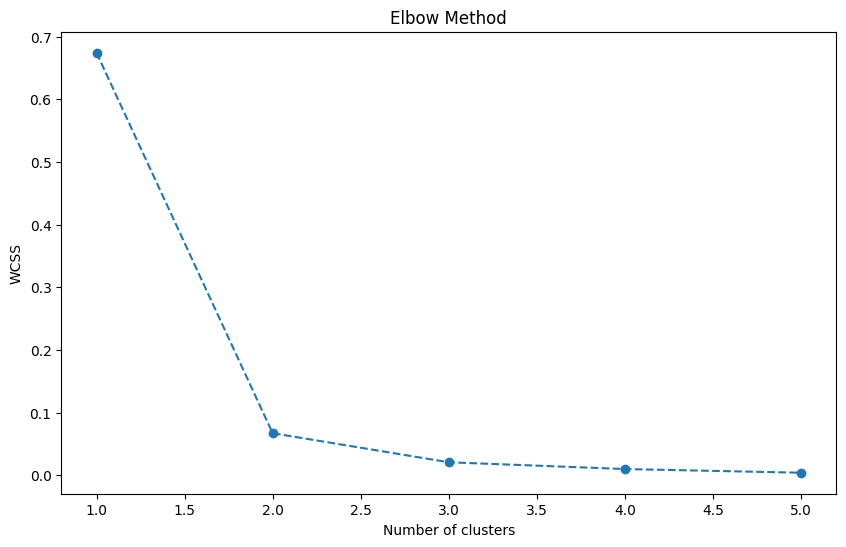

Cluster Labels: [1 1 1 0 0 2 0 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data from the image
data = np.array([
    [0.432391, 0.086325, 0.481284],
    [0.416233, 0.094661, 0.489106],
    [0.347091, 0.099297, 0.553611],
    [0.039774, 0.194415, 0.765811],
    [0.015724, 0.160014, 0.824262],
    [0.0, 0.0, 1.0],
    [0.0, 0.146638, 0.853362],
    [0.348636, 0.134576, 0.516788],
    [0.050787, 0.120793, 0.82842],
    [0.348837, 0.114347, 0.536817]
])

# Function to perform K-means clustering and plot the elbow method
def elbow_method(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Perform the elbow method to determine the optimal number of clusters
elbow_method(data, max_clusters=5)

# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 3  # You can adjust this based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:", labels)


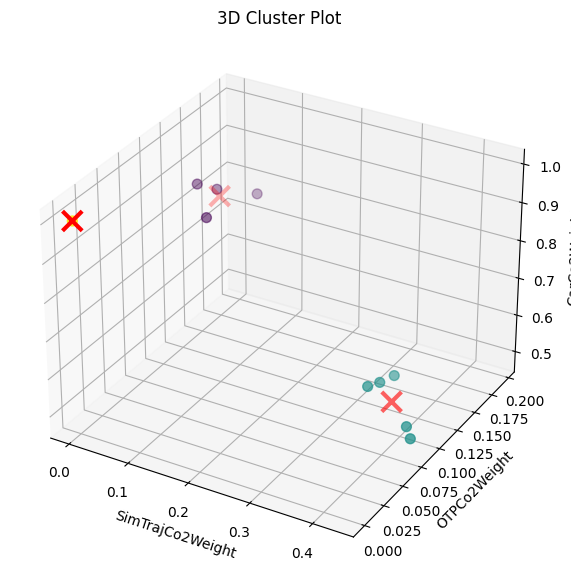

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Sample data from the image
data = np.array([
    [0.432391, 0.086325, 0.481284],
    [0.416233, 0.094661, 0.489106],
    [0.347091, 0.099297, 0.553611],
    [0.039774, 0.194415, 0.765811],
    [0.015724, 0.160014, 0.824262],
    [0.0, 0.0, 1.0],
    [0.0, 0.146638, 0.853362],
    [0.348636, 0.134576, 0.516788],
    [0.050787, 0.120793, 0.82842],
    [0.348837, 0.114347, 0.536817]
])

# Perform K-means clustering with explicit n_init
optimal_clusters = 3  # You can adjust this based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init="auto", random_state=42)
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with cluster colors
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, linewidths=3)

# Set labels and title
ax.set_xlabel('SimTrajCo2Weight')
ax.set_ylabel('OTPCo2Weight')
ax.set_zlabel('CarCo2Weight')
ax.set_title('3D Cluster Plot')

# Show the plot
plt.show()


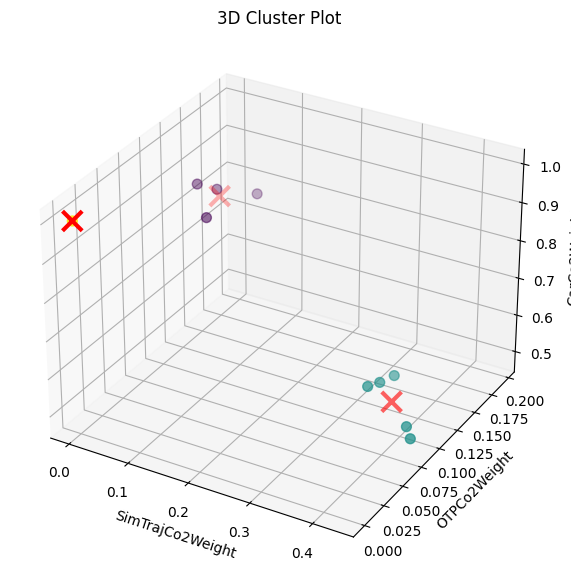

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Sample data from the image
data = np.array([
    [0.432391, 0.086325, 0.481284],
    [0.416233, 0.094661, 0.489106],
    [0.347091, 0.099297, 0.553611],
    [0.039774, 0.194415, 0.765811],
    [0.015724, 0.160014, 0.824262],
    [0.0, 0.0, 1.0],
    [0.0, 0.146638, 0.853362],
    [0.348636, 0.134576, 0.516788],
    [0.050787, 0.120793, 0.82842],
    [0.348837, 0.114347, 0.536817]
])

# Perform K-means clustering with n_init explicitly set
optimal_clusters = 3  # You can adjust this based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with cluster colors
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, linewidths=3)

# Set labels and title
ax.set_xlabel('SimTrajCo2Weight')
ax.set_ylabel('OTPCo2Weight')
ax.set_zlabel('CarCo2Weight')
ax.set_title('3D Cluster Plot')

# Enable interactive mode
plt.show()
